In [1]:
import numpy as np
np_img = np.zeros((27548, 224, 224, 3))

In [2]:
import pandas as pd
from skimage import io, color, transform
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np_img.shape

(27548, 224, 224, 3)

In [4]:
df = pd.read_csv('bigbasket_products.csv', engine='python', encoding='utf-8', error_bad_lines=False)
imgurl_list = df['image_url'].tolist()
# category_list = df['category'].tolist()

# cat_LE = LabelEncoder().fit_transform(category_list)
# cat_OneHot = np_utils.to_categorical(cat_LE) 

# preprocessed_img = []
i = 0
idx = 0
err = []
arr = [100, 1000, 3000, 5000, 7000, 10000, 13000, 15000, 17000, 20000, 22000]
for url in imgurl_list:

    if i in arr:
        print(i)
        
    try:
        img = io.imread(url)
        # img = img.astype('uint8')
        # print('1', img)

        # grayscale conversion
        # img_gray = color.rgb2gray(img)

        # standardization: scales and preprocesses images to have similar heights and widths => goal: standard deviation = 1(unit variance), mean = 0
        img_resized = transform.resize(img, (224, 224))
        # img_resized = img_resized.astype('uint8')
        # print('2', img_resized)

        # normalization: projecting image data pixels (intensity) to a predefined range (usually (0,1) or (-1, 1))
        img_resized_norm = (img_resized - np.min(img_resized)) / (np.max(img_resized) - np.min(img_resized))
        # img_resized_norm = img_resized_norm.astype('uint8')
        # print('3', img_resized_norm.shape)

        np_img[idx] = img_resized_norm
        idx += 1

        # preprocessed_img.append(img_resized_norm)
        del img
        del img_resized
        del img_resized_norm
    except:
        err.append(i)
        continue
    i += 1

# preprocessed_img = np.asarray(preprocessed_img)
# print(preprocessed_img.shape)
# plt.imshow(preprocessed_img[0,:,:])
# plt.show() 
print(np_img.shape)

100
1000
3000
5000
7000
10000
13000
15000
17000
20000
22000
(27548, 224, 224, 3)


In [5]:
np.save('X.npy', np_img)

In [2]:
# from tensorflow.keras import datasets
# import tensorflow as tf

C:\Users\c5500\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\c5500\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\c5500\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\c5500\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

(100, 224, 224, 3)


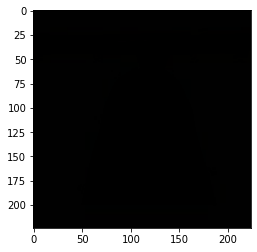

In [6]:
import pandas as pd
from skimage import io, color, transform
import numpy as np
import matplotlib.pyplot as plt

from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

# https://www.section.io/engineering-education/image-preprocessing-in-python/
df = pd.read_csv('amazon_data.csv', engine='python', encoding='utf-8', error_bad_lines=False, nrows =100)
imgurl_list = df['image url'].tolist()
category_list = df['category'].tolist()

# one hot encoding
cat_LE = LabelEncoder().fit_transform(category_list)
cat_OneHot = np_utils.to_categorical(cat_LE) 

# list of numpy array
preprocessed_img = []
for url in imgurl_list:
    # io.imread(): returns a numpy array
    img = io.imread(url)
    img = img.astype('uint8')

    # grayscale conversion
#     img_gray = color.rgb2gray(img)
    # standardization: scales and preprocesses images to have similar heights and widths => goal: standard deviation = 1(unit variance), mean = 0
    img_resized = transform.resize(img, (224, 224))
    img_resized = img_resized.astype('uint8')
    # normalization: projecting image data pixels (intensity) to a predefined range (usually (0,1) or (-1, 1))
    img_resized_norm = (img_resized - np.min(img_resized)) / (np.max(img_resized) - np.min(img_resized))
    img_resized_norm = img_resized_norm.astype('uint8')
    
    del img
    
    preprocessed_img.append(img_resized_norm)

preprocessed_img = np.asarray(preprocessed_img)
print(preprocessed_img.shape)
plt.imshow(preprocessed_img[2,:,:])
plt.show() 

In [8]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(preprocessed_img, cat_OneHot, test_size=0.2,shuffle = True)
X_train, X_test, y_train, y_test = train_test_split(preprocessed_img, cat_LE, test_size=0.2,shuffle = True)
X_train, X_test = X_train / 255.0, X_test / 255.0
classes = len(set(cat_LE))

In [ ]:
# (X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
# X_train = tf.image.resize(X_train, [224, 224])
# X_test = tf.image.resize(X_test, [224, 224])

In [3]:

# a = tf.constant([[1, 2], [3, 4]])                 
# b = tf.add(a, 1)

# a.numpy()

array([[1, 2],
       [3, 4]])

In [9]:
print(X_train.shape)
print(y_train.shape)

(80, 224, 224, 3)
(80,)


In [ ]:
# X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
# classes = len(np.unique(y_test))
# classes

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D, AveragePooling2D, concatenate, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
import numpy as np

seed = 7
np.random.seed(seed)


def Conv2d_BN(x, nb_filter, kernel_size, padding='same', strides=(1, 1), name=None):
    if name is not None:
        bn_name = name + '_bn'
        conv_name = name + '_conv'
    else:
        bn_name = None
        conv_name = None

    x = Conv2D(nb_filter, kernel_size, padding=padding, strides=strides, activation='relu', name=conv_name)(x)
    x = BatchNormalization(axis=3, name=bn_name)(x)
    return x


def Inception(x, nb_filter):
    branch1x1 = Conv2d_BN(x, nb_filter, (1, 1), padding='same', strides=(1, 1), name=None)

    branch3x3 = Conv2d_BN(x, nb_filter, (1, 1), padding='same', strides=(1, 1), name=None)
    branch3x3 = Conv2d_BN(branch3x3, nb_filter, (3, 3), padding='same', strides=(1, 1), name=None)

    branch5x5 = Conv2d_BN(x, nb_filter, (1, 1), padding='same', strides=(1, 1), name=None)
    branch5x5 = Conv2d_BN(branch5x5, nb_filter, (1, 1), padding='same', strides=(1, 1), name=None)

    branchpool = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
    branchpool = Conv2d_BN(branchpool, nb_filter, (1, 1), padding='same', strides=(1, 1), name=None)

    x = concatenate([branch1x1, branch3x3, branch5x5, branchpool], axis=3)

    return x


inpt = Input(shape=(224, 224, 3))
# padding = 'same'，填充為(步長-1）/2,還可以用ZeroPadding2D((3,3))
x = Conv2d_BN(inpt, 64, (7, 7), strides=(2, 2), padding='same')
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
x = Conv2d_BN(x, 192, (3, 3), strides=(1, 1), padding='same')
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
x = Inception(x, 64)  # 256
x = Inception(x, 120)  # 480
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
x = Inception(x, 128)  # 512
x = Inception(x, 128)
x = Inception(x, 128)
x = Inception(x, 132)  # 528
x = Inception(x, 208)  # 832
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
x = Inception(x, 208)
x = Inception(x, 256)  # 1024
x = AveragePooling2D(pool_size=(7, 7), strides=(7, 7), padding='same')(x)
x = Dropout(0.4)(x)
x = Flatten(x)
x = Dense(1000, activation='relu')(x)
x = Dense(classes, activation='softmax')(x)
model = Model(inpt, x, name='inception')
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # 注意!loss有時候是sparse_
model.summary()

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

In [4]:
import keras 
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from keras.regularizers import l2
from keras.optimizers import SGD, RMSprop
from keras.utils import to_categorical
from keras.layers.normalization import BatchNormalization
from keras.utils.vis_utils import plot_model
from keras.layers import Input, GlobalAveragePooling2D
from keras import models
from keras.models import Model

input_img = Input(shape=(224, 224, 3))

### 1st layer
layer_1 = Conv2D(10, (1,1), padding='same', activation='relu')(input_img)
layer_1 = Conv2D(10, (3,3), padding='same', activation='relu')(layer_1)

layer_2 = Conv2D(10, (1,1), padding='same', activation='relu')(input_img)
layer_2 = Conv2D(10, (5,5), padding='same', activation='relu')(layer_2)

layer_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_img)
layer_3 = Conv2D(10, (1,1), padding='same', activation='relu')(layer_3)

mid_1 = keras.layers.concatenate([layer_1, layer_2, layer_3], axis = 3)

flat_1 = Flatten()(mid_1)

dense_1 = Dense(1200, activation='relu')(flat_1)
dense_2 = Dense(600, activation='relu')(dense_1)
dense_3 = Dense(150, activation='relu')(dense_2)
output = Dense(classes, activation='softmax')(dense_3)

model = Model(input_img, output)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # 注意!loss有時候是sparse_
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 224, 224, 10) 40          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 224, 224, 10) 40          input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 224, 224, 3)  0           input_1[0][0]                    
___________________________________________________________________________________________

In [10]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Train on 64 samples, validate on 16 samples
Epoch 1/5


ResourceExhaustedError: OOM when allocating tensor with shape[1505280,1200] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[{{node training/Adam/mul_51}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
